In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, FuncAnimation
from FANTASY import geodesic_integrator
from geodesic_metrics import (update_param, 
                              g00, g01, g02, g03, g11, g12, g13, g22, g23, g33, 
                              mag, Newtonian_orbit, 
                              get_orbital_evolution, get_orbital_velocity)
from geodesic_plotting import plot_traj, animate_trajectories

from main import run_simulation, simulate_Newtonian

from calcTensors import calculate_tensors, evaluate_scalars,plot_scalars

Delta 0.0202132981717851


  0%|          | 0/35 [00:00<?, ?it/s]

 43%|████▎     | 15/35 [00:14<00:18,  1.06it/s]

Particle ejected
Final position: [5.39066098e-05 3.66895781e-06 0.00000000e+00]
Time taken: N=15 out of N=35
This corresonds to about 0.303T_0
Ending program


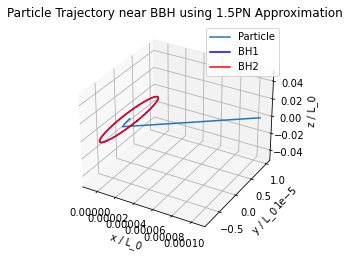

In [6]:
x, y, z, rs_1, rs_2, vs_1, vs_2, vs_12, Param, sol, param_storage = run_simulation(test_accuracy=True)

plot_traj(x, y, z, rs_1, rs_2, proj="3D")

# animate_trajectories(x,y,z,rs_1,rs_2, a=max(x[-1],y[-1]),proj="3D", save_fig=f"3danim_test")

### Constants and units

In [2]:
# Fantasy simulation parameters

omega = 1                   # Do not confuse with angular frequency
order = 4

G = c = 1                   # Geometrized units

# G and c in SI units
c_SI = 3e8
G_SI = 6.67e-11

# Set time scale (in seconds), determines length and mass scales through dimensional analysis
T_0 = 3.14e7                # T_0 [s], 1 year is ~ pi x 10^7 seconds
L_0 = c_SI * T_0            # 3e8 * T_0 [m] ~ 0.002 * T_0 [AU]
M_0 = (c_SI**3 / G_SI) * T_0   # 4.05e35 * T_0 [kg] ~ 2e5 * T_0[solar masses]

# Relevant length and mass scales in geometric units
AU_in_natunits = 1 / (0.002 * T_0)
SOLARMASS_in_natunits = 1 / (2e5 * T_0)



### Example simulation

In [3]:
M, a0 = 1 * SOLARMASS_in_natunits, 1/100 * AU_in_natunits   # Mass of each BH in binary, initial separation
M1, M2 = 1/2*M, 1/3*M                                    # Masses of each BH in binary
e0 = 0.80                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
N = 200

q0 = [0.0,a0/2,-a0/2,0.0]                                # Initial position of particle
q0 = [0.,0.,0.,0.]
p0 = [1.0,0.0,0.00,0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = -0.1, 0.5
S1, S2 = np.array([1,-1,2]), np.array([-1,-2,3])
S1, S2 = ((chi * M**2 * S / mag(S) if mag(S) != 0 else 0) for chi, S in zip([chi1, chi2], [S1,S2]))

x1, y1, z1, rs_1_1, rs_2_1, vs_1_1, vs_2_1, vs_12_1, Param_1, sol_1 = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)


Delta 5.480003703387398e-06


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [02:41<00:00,  1.24it/s]


8.660702156005481e-13 1.7823418729262381e-12 7.971679331320042e-13


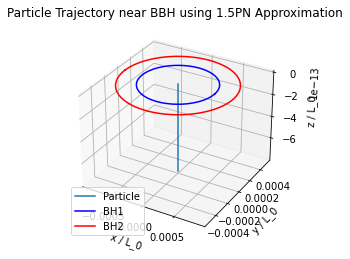

In [4]:
print(np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1)))
a_x, a_y, a_z = np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1))
a = [a_x, a_y, a_z]
plot_traj(x1, y1, z1, rs_1_1, rs_2_1, proj="3D")    # Change plot_traj to take in a

In [6]:
plot_traj(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D")

TypeError: plot_traj() got an unexpected keyword argument 'a'

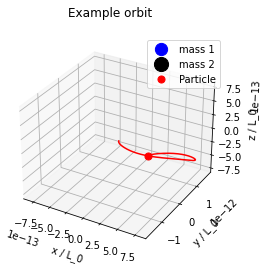

In [8]:
# animate_trajectories(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D", title=f"Example orbit")
animate_trajectories(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D", title=f"Example orbit", save_fig=True)

## Stable L4 point

In [3]:
M, a0 = 1 * SOLARMASS_in_natunits, 1 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.0*M, 1.0*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
N = 1000

mu = 0.5
mu2, mu1 = mu, 1-mu
a = 1
x0 = (-a0*mu2+a0*mu1)/2
y0 = (a0*mu2+a0*mu1)*np.sqrt(3)/2
z0 = 0.0

# T = 2*np.pi*np.sqrt(a0**3/M)
v0 = np.sqrt(M/a0)
vx0, vy0, vz0 = -v0, 0.0, 0.0

q0 = [0.0, x0 , y0 , z0]                                   # Initial position of particle
p0 = [1.0, vx0, vy0, vz0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 0.0, 0.0
S1, S2 = np.array([0,0,0]), np.array([0,0,0])

x1, y1, z1, rs_1_1, rs_2_1, vs_1_1, vs_2_1, vs_12_1, Param_1, sol_1, param_storage1 = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2, test_accuracy=True)


Delta 0.0007074654360124786


  0%|          | 0/1000 [00:00<?, ?it/s]

 52%|█████▏    | 523/1000 [02:46<02:32,  3.14it/s]

Particle ejected
Final position: [2.35104953e-05 4.54340960e-06 0.00000000e+00]
Time taken: N=523 out of N=1000
This corresonds to about 0.37T_0
Ending program


2.357921064995939e-05 1.3789941223926496e-05 0.0


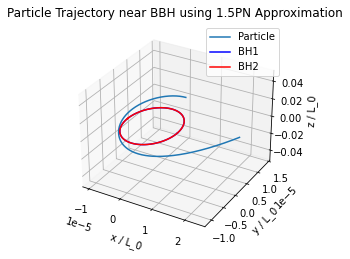

In [4]:
print(np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1)))
a_x, a_y, a_z = np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1))
a = [a_x, a_y, a_z]
plot_traj(x1, y1, z1, rs_1_1, rs_2_1, proj="3D")    # Change plot_traj to take in a

c:\Users\jmonc\hon_code\particle_orbits\geodesic_solver\geodesic_plotting.py:93: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_zlim(-a_z, a_z)


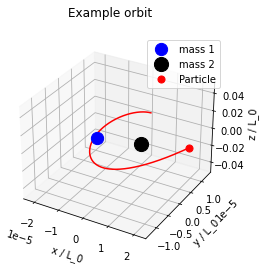

In [5]:
animate_trajectories(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D", title=f"Example orbit", save_fig=True)

In [7]:
Ks, Rs = evaluate_scalars(param_storage1)

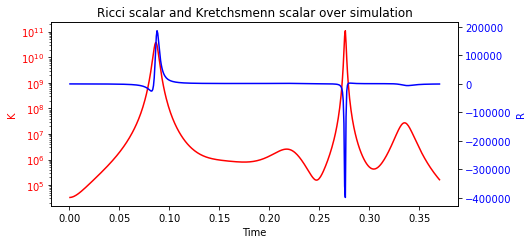

In [8]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data1 = Ks
data2 = Rs
t = np.array(param_storage1)[1:,0]

fig, ax1 = plt.subplots()
color = 'red'

ax1.set_xlabel('Time')
ax1.set_ylabel('K', color=color)
ax1.plot(t, data1, color=color)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('R', color=color)
ax2.plot(t, data2, color=color)
# ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Ricci scalar and Kretchsmenn scalar over simulation")

plt.show()


In [30]:
from calcTensors import evaluate_scalars, plot_scalars

ImportError: cannot import name 'evaluate_scalars' from 'calcTensors' (c:\Users\jmonc\hon_code\particle_orbits\geodesic_solver\calcTensors.py)

## Gravitational wave losses

In [8]:
# 300km ~ 2e-6 AU ~ 100 Schwarzschild radii

M, a0 = 1 * SOLARMASS_in_natunits, 5e-6 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 0.5*M, 0.5*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 4
N = 10000

T = 2*np.pi*np.sqrt(a0**3/M)

q0 = [0.0, 0.0, 0.0, 0.0]                                  # Initial position of particle
p0 = [1.0, 0.0, 0.0, 0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 0.1, 0.1
S1, S2 = np.array([0,0,1]), np.array([0,0,1])

xGW, yGW, zGW, rs_1GW, rs_2GW, vs_1GW, vs_2GW, vs_12_GW, Param_1GW, sol_GW = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)


Delta 4.474404287287087e-12


  7%|▋         | 709/10000 [06:29<1:25:03,  1.82it/s]

Particle ejected
Final position: [ 1.11220432e-11 -8.04990509e-11  0.00000000e+00]
Time taken: N=709 out of N=10000
This corresonds to about 3.17e-09T_0
Ending program


TODO: 
- Perform more experiments with simulation (and write up results).
- Add in perturbed Kerr metric for values close to a black hole.
- Calculate Christoffel symbols, Ricci tensors, Kretschmenn scalar etc numerially in simulation.
- Get statistics on simulations, rather than single instances.

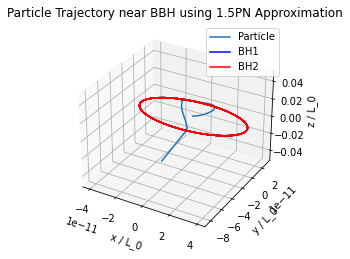

In [9]:
plot_traj(xGW, yGW, zGW, rs_1GW, rs_2GW, proj="3D")    # Change plot_traj to take in a

In [10]:
ax = max(np.max(np.abs(xGW)), rs_1GW[0,0])
ay = max(np.max(np.abs(yGW)), rs_1GW[0,0])
az = max(np.max(np.abs(zGW)), rs_1GW[0,0])

In [11]:
rs_1GW[::10]

array([[ 3.98089172e-11,  0.00000000e+00,  0.00000000e+00],
       [ 3.97963133e-11,  6.61770059e-13,  0.00000000e+00],
       [ 3.97585680e-11,  1.32312253e-12,  0.00000000e+00],
       ...,
       [ 3.97389457e-11, -1.19039738e-12,  0.00000000e+00],
       [ 3.97716397e-11, -5.27953805e-13,  0.00000000e+00],
       [ 3.97790969e-11,  1.34825265e-13,  0.00000000e+00]])

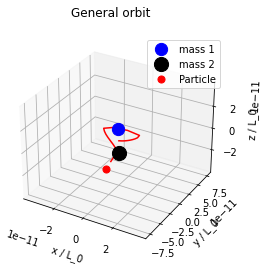

In [12]:
animate_trajectories(xGW[::10], yGW[::10], zGW[::10], rs_1GW[::10], rs_2GW[::10], proj="3D", a=[ax,ay,az], title=f"General orbit", save_fig=True)

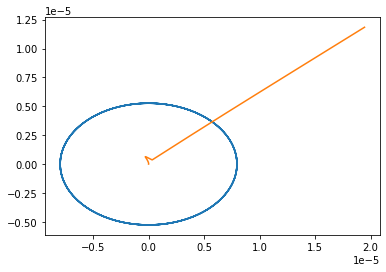

In [18]:
plt.plot(rs_1GW[:,0], rs_1GW[:,1], label="BH1")
plt.plot(xGW, yGW, label="Particle")

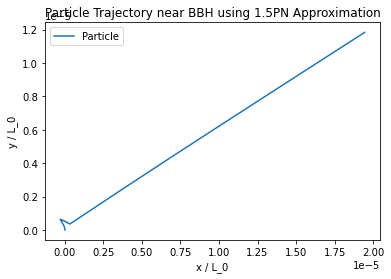

In [26]:
plot_traj(xGW, yGW, zGW, rs_1GW, rs_2GW, proj="2D")

## Spin orbit effects

#### No spin

In [16]:
# 300km ~ 2e-6 AU ~ 100 Schwarzschild radii

M, a0 = 1 * SOLARMASS_in_natunits, 1 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.0*M, 1.0*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 4
N = 1000

T = 2*np.pi*np.sqrt(a0**3/M)

q0 = [0.0, 0.0, 0.0, 0.0]                                  # Initial position of particle
p0 = [1.0, 0.0, 0.0, 0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 0.0, 0.0
S1, S2 = np.array([0,0,1]), np.array([0,0,1])

xL1, yL1, zL1, rs_1L1, rs_2L1, vs_1L1, vs_2L1, vs_12_L1, Param_1L1, sol_L1 = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)


Delta 0.0028298617440499145


  0%|          | 0/1000 [00:00<?, ?it/s]

 16%|█▌        | 155/1000 [01:48<09:50,  1.43it/s]

Particle ejected
Final position: [-1.02679886e-05 -2.23753506e-05  0.00000000e+00]
Time taken: N=155 out of N=1000
This corresonds to about 0.439T_0
Ending program


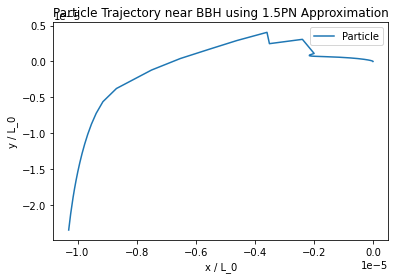

In [17]:
plot_traj(xL1, yL1, zL1, rs_1L1, rs_2L1, proj="2D")    # Change plot_traj to take in a

#### Aligned spins

Delta 0.0028298617440499145


 18%|█▊        | 177/1000 [01:56<09:03,  1.51it/s]

Particle ejected
Final position: [ 1.04166146e-06 -2.39034806e-05  0.00000000e+00]
Time taken: N=177 out of N=1000
This corresonds to about 0.501T_0
Ending program


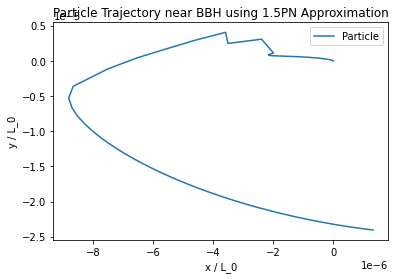

In [18]:
M, a0 = 1 * SOLARMASS_in_natunits, 1 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.0*M, 1.0*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 4
N = 1000

T = 2*np.pi*np.sqrt(a0**3/M)

q0 = [0.0, 0.0, 0.0, 0.0]                                  # Initial position of particle
p0 = [1.0, 0.0, 0.0, 0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 1.0, 1.0
S1, S2 = np.array([0,0,1]), np.array([0,0,1])

xL1_aligned, yL1_aligned, zL1_aligned, rs_1L1_aligned, rs_2L1_aligned, vs_1L1_aligned, vs_2L1_aligned, vs_12_L1_aligned, Param_1L1_aligned, sol_L1_aligned = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)
plot_traj(xL1_aligned, yL1_aligned, zL1_aligned, rs_1L1_aligned, rs_2L1_aligned, proj="2D")

#### Anti-aligned spins

Delta 0.0028298617440499145


  0%|          | 0/1000 [00:00<?, ?it/s]

 14%|█▍        | 145/1000 [01:32<09:04,  1.57it/s]

Particle ejected
Final position: [-1.64234776e-05 -2.17307423e-05  0.00000000e+00]
Time taken: N=145 out of N=1000
This corresonds to about 0.41T_0
Ending program


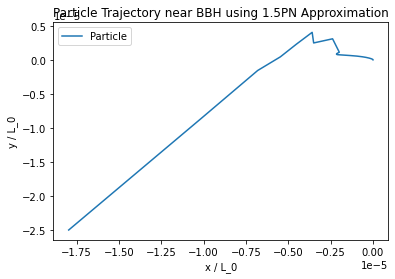

In [20]:
M, a0 = 1 * SOLARMASS_in_natunits, 1 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.0*M, 1.0*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 4
N = 1000

T = 2*np.pi*np.sqrt(a0**3/M)

q0 = [0.0, 0.0, 0.0, 0.0]                                  # Initial position of particle
p0 = [1.0, 0.0, 0.0, 0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 1.0, -1.0
S1, S2 = np.array([0,0,1]), np.array([0,0,1])

xL1_anti_aligned, yL1_anti_aligned, zL1_anti_aligned, rs_1L1_anti_aligned, rs_2L1_anti_aligned, vs_1L1_anti_aligned, vs_2L1_anti_aligned, vs_12_L1_anti_aligned, Param_1L1_anti_aligned, sol_L1_anti_aligned = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)
plot_traj(xL1_anti_aligned, yL1_anti_aligned, zL1_anti_aligned, rs_1L1_anti_aligned, rs_2L1_anti_aligned, proj="2D")

Delta 0.0028298617440499145


 15%|█▍        | 149/1000 [01:45<10:03,  1.41it/s]

Particle ejected
Final position: [ 1.04397270e-05  2.19993475e-05 -4.12362408e-14]
Time taken: N=149 out of N=1000
This corresonds to about 0.422T_0
Ending program


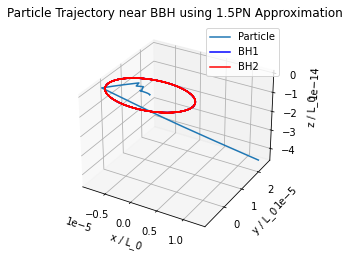

In [21]:
M, a0 = 1 * SOLARMASS_in_natunits, 1 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.0*M, 1.0*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 4
N = 1000

T = 2*np.pi*np.sqrt(a0**3/M)

q0 = [0.0, 0.0, 0.0, 0.0]                                  # Initial position of particle
p0 = [1.0, 0.0, 0.0, 0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 1.0, -1.0
S1, S2 = np.array([0.5,-0.7,1.2]), np.array([1.2,-0.3,0.8])

xL1_spin, yL1_spin, zL1_spin, rs_1L1_spin, rs_2L1_spin, vs_1L1_spin, vs_2L1_spin, vs_12_L1_spin, Param_1L1_spin, sol_L1_spin = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)
plot_traj(xL1_spin, yL1_spin, zL1_spin, rs_1L1_spin, rs_2L1_spin, proj="3D")

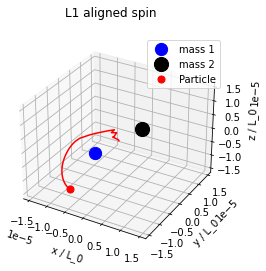

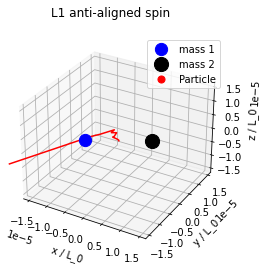

In [27]:
animate_trajectories(xL1_spin, yL1_spin, zL1_spin, rs_1L1_spin, rs_2L1_spin, a=[a0, a0, a0], proj="3D", title=f"L1 random spin", save_fig=True)
animate_trajectories(xL1_aligned, yL1_aligned, zL1_aligned, rs_1L1_aligned, rs_2L1_aligned, a=[a0,a0,a0], proj="3D", title=f"L1 aligned spin", save_fig=True)
animate_trajectories(xL1_anti_aligned, yL1_anti_aligned, zL1_anti_aligned, rs_1L1_anti_aligned, rs_2L1_anti_aligned, a=[a0,a0,a0], proj="3D", title=f"L1 anti-aligned spin", save_fig=True)

## Comparison to simple model and error analysis

### L1 Lagrange point

#### Parameters

In [13]:
a0 = AU_in_natunits * 1.0
M = SOLARMASS_in_natunits * 1.0

M1, M2 = 1*M, 1*M                          # Masses of each BH in binary
m1, m2 = M1, M2
Porb0 = (2 * np.pi / np.sqrt(M/a0**3))     # Initial orbital period
e0 = 0.0                                   # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
T = num_orbits * Porb0
N = 1000
dt = T / N
delta = dt
t = np.linspace(0, T, N)

q0 = [0.0,0,0,0.0]                          # Initial position of particle
p0 = [1.0,0,0.00,0.0]                       # Initial velocity of particle

# Position vectors of each black hole
rs_1, rs_2 = get_orbital_evolution(M1, M2, Porb0, e0, T, N)

# Velocity vectors of each black hole in binary
vs_1, vs_2 = get_orbital_velocity(rs_1, rs_2, T, N)

# Calculate relative position and velocity of binaries
rs_12 = (rs_1 - rs_2)
Rs_12 = np.linalg.norm(rs_12, axis=1)[:,None]
ns_12 = rs_12 / Rs_12
vs_12 = vs_1 - vs_2
Vs_12 = np.linalg.norm(vs_12, axis=1)

# Parameter values
x_0 = q0[1:]              # Initial postion of particle
r1_0 = rs_1[0,:]          # Initial position of particle at x_0 relative to BH1
r2_0 = rs_2[0,:]          # Initial position of particle at x_0 relative to BH2
r12_0 = rs_12[0,:]        # Relative positions of BHs at t = 0
v1_0 = vs_1[0,:]          # Initial velocity of particle at x_0 relative to BH1
v2_0 = vs_2[0,:]
v12_0 = vs_12[0,:]

# Spin
chi1, chi2 = -1.0, 1.0
S1, S2 = np.array([1,-1,2]), np.array([-1,-2,3])
S1, S2 = chi1 * M**2 * c_SI * 100 * S1 / mag(S1), chi2 * M**2 * c_SI * 100 * S2 / mag(S2)
S1, S2 = np.array([0,0,1]), np.array([0,0,1])
S1, S2 = np.array([0,0,0]), np.array([0,0,0])

Param = [x_0, m1, m2, r1_0, r2_0, r12_0, v1_0, v2_0, v12_0, S1, S2]

### Run simulation

In [8]:
sol = geodesic_integrator(N,delta,omega,q0,p0,Param,order,rs_1=rs_1,rs_2=rs_2,rs_12=rs_12,vs_1=vs_1,vs_2=vs_2,vs_12=vs_12,update_parameters=True)

Delta 0.0010005072145190424


 56%|█████▌    | 559/1000 [02:49<02:13,  3.31it/s]

Particle ejected
Final position: [-1.92554408e-05 -2.49904948e-05  0.00000000e+00]
Time taken: N=559 out of N=1000
This corresonds to about 0.559T_0
Ending program


### Plotting

KeyError: 'm1'

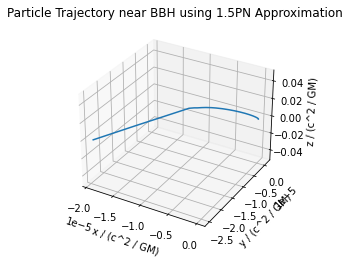

In [24]:
# Get the position and momentum of the particle in the first phase space
sol = np.array(sol[1:])

qs = sol[:,0,:]
ps = sol[:,1,:]

x, y, z = qs[:,1], qs[:,2], qs[:,3]

plot_traj(x, y, z, rs_1, rs_2)


pos = Newtonian_orbit(rs_1, rs_2, m1, m2, q0, p0, dt, N)
x_newton = pos[:,0]
y_newton = pos[:,1]
z_newton = pos[:,2]

plot_traj(x_newton, y_newton, z_newton, rs_1, rs_2)



### Animation

KeyboardInterrupt: 

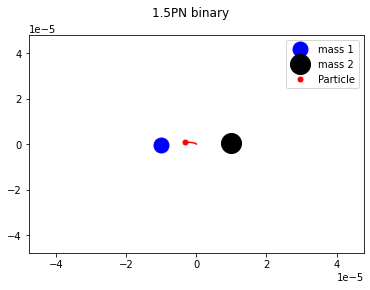

In [23]:
import os

anim_filename = "test_zjupyter"

cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
anim_path = os.path.join(parent_dir, "animations", anim_filename)

ani = animate_trajectories(x,y,z,rs_1,rs_2,a=3*a0,save_fig=anim_path)

NameError: name 'SOLARMASS_in_natunits' is not defined

In [ ]:
# plot_traj(x1, y1, z1, rs_1_1, rs_2_1)
animate_trajectories(x1,y1,z1,rs_1_1,rs_2_1, save_fig=f"test_znaming_optional", no_parent="True")

### Calculate tensors

In [13]:
from calcTensors import *

param0 = param_storage[1]
t_val, a0_val, ω_val, m1_val, m2_val, x_val, y_val, z_val, dxdt_val, dydt_val, dzdt_val, S1x, S1y, S1z, S2x, S2y, S2z = param0
test_values = (t_val, a0_val, ω_val, m1_val, m2_val, x_val, y_val, z_val, dxdt_val, dydt_val, dzdt_val, S1x, S1y, S1z, S2x, S2y, S2z)

In [14]:
g_test = g_numeric(*test_values)
Gamma_test = compute_christoffel(*test_values)
Gamma_test_partials = compute_partial_christoffel(*test_values)

riemann_test = riemann(Gamma_test_partials, np.linalg.inv(g_numeric(*test_values)))
ricci_tensor_test = ricci_tensor(riemann_test)
ricci_scalar_test = ricci_scalar(ricci_tensor_test, np.linalg.inv(g_test))

g_inv_test = np.linalg.inv(g_test)

K_test = compute_kretschmann(riemann_test, g_inv_test)

print("g =\n", g_test)
print("Gamma =\n", Gamma_test)
print("Riemann =\n", riemann_test)
print("Ricci tensor =\n", ricci_tensor_test)
print("Ricci scalar =\n", ricci_scalar_test)
print("Kretschmann =\n", K_test)
print("Landau-Lifshitz =\n", compute_landau_lifshitz(Gamma_test, g_inv_test))

g =
 [[ 0.99999992  0.          0.         -0.        ]
 [ 0.          1.00000008  0.          0.        ]
 [ 0.          0.          1.00000008  0.        ]
 [-0.          0.          0.          1.00000008]]
Gamma =
 [[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  8.77265024e-18  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  8.77265024e-18  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.77265024e-18]]

 [[ 0.00000000e+00 -8.77264884e-18  0.00000000e+00  0.00000000e+00]
  [-8.77264884e-18  1.73478158e-09 -1.06488885e-08  0.00000000e+00]
  [ 0.00000000e+00 -1.06488885e-08 -1.73478158e-09  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.73478158e-09]]

 [[ 0.00000000e+00  0.00000000e+00 -8.77264884e-18  0.00000000e+00]
  [ 0.00000000e+00  1.06488885e-08  1.73478158e-09  0.00000000e+00]
  [-8.77264884e-18  1.73478158e-09 -1.06488885e-08  0.00000000e+00]
  [ 0.00000000e+00  0.0000000

In [8]:
Ks = []
Rs = []

for i in range(1, len(param_storage)):
    t_val, a0_val, ω_val, m1_val, m2_val, x_val, y_val, z_val, dxdt_val, dydt_val, dzdt_val, S1x, S1y, S1z, S2x, S2y, S2z = param_storage[i]
    test_values = (t_val, a0_val, ω_val, m1_val, m2_val, x_val, y_val, z_val, dxdt_val, dydt_val, dzdt_val, S1x, S1y, S1z, S2x, S2y, S2z)
    
    g_metric, g_inv, Gamma, Gamma_partials, riemann_tensor, ricci_tensor_test, ricci_scalar_test, K_test = calculate_tensors(test_values)

    
    # g_test = g_numeric(*test_values)
    # Gamma_test = compute_christoffel(*test_values)
    # Gamma_test_partials = compute_partial_christoffel(*test_values)

    # riemann_test = riemann(Gamma_test_partials, np.linalg.inv(g_numeric(*test_values)))
    # ricci_tensor_test = ricci_tensor(riemann_test)
    # ricci_scalar_test = ricci_scalar(ricci_tensor_test, np.linalg.inv(g_test))

    # g_inv_test = np.linalg.inv(g_test)

    # K_test = compute_kretschmann(riemann_test, g_inv_test)
    
    Rs.append(ricci_scalar_test)
    Ks.append(K_test)
    
    

In [18]:
len(Ks)

15

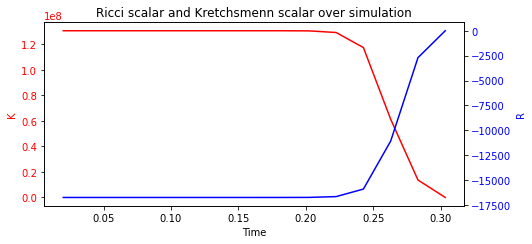

In [26]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data1 = Ks
data2 = Rs
t = np.array(param_storage)[1:,0]

fig, ax1 = plt.subplots()
color = 'red'

ax1.set_xlabel('Time')
ax1.set_ylabel('K', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('R', color=color)
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Ricci scalar and Kretchsmenn scalar over simulation")

plt.show()


In [22]:
Rs

[-16749.344629668427,
 -16749.344608920223,
 -16749.344537149103,
 -16749.34440059249,
 -16749.34423264696,
 -16749.3441758911,
 -16749.34475310666,
 -16749.33835425289,
 -16749.016042707826,
 -16742.873440111274,
 -16663.195146634072,
 -15906.519286699924,
 -11082.4178166021,
 -2703.951709289381,
 2.597427319343116]